In [1]:
import json
from collections import defaultdict

import aemeasure
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


## Load experiment data

In [2]:
experiment_table_1 = aemeasure.read_as_pandas_table("results/be_smart_60it_60sec")
experiment_table_2 = aemeasure.read_as_pandas_table("results/be_smart_55it_60sec")

experiment_table = pd.concat([experiment_table_1, experiment_table_2])
experiment_table

,increase_added_edges_per_iter,instance,time_limit,iterations,cds_iter_stop,cds_optimize_stop,cds_found_solution_size,cds_proven_optimal,cds_grb_status,cds_global_lb,...,cds_iter_start,runtime,stdout,stderr,timestamp,hostname,argv,git_revision,python_env,cwd
0,True,financial-services-2018-01-23,60.0,60,"[1677542456926, 1677542483930, 1677542515322, ...","[1677542456926, 1677542483929, 1677542515322, ...","[338, 459, 471, 481, 510, 515, 547, 563, 589, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[338, 459, 471, 481, 510, 515, 547, 563, 589, ...",...,"[1677542393318, 1677542456926, 1677542483930, ...",1663.625548,,,2023-02-28T01:27:35.353772,algry01,/ibr/home/ggehrke/anaconda3/envs/quantum/lib/p...,f0f5efbedfdca1012ee6a239bbfea3181757945a,"[{'name': 'networkx', 'path': '/misc/ibr/home/...",/misc/ibr/home/ggehrke/git/software-configurat...
1,False,financial-services-2018-01-23,60.0,60,"[1677542456778, 1677542512344, 1677542625331, ...","[1677542456778, 1677542512344, 1677542625331, ...","[346, 525, 535, 545, 563, 567, 580, 590, 595, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[346, 525, 535, 545, 563, 567, 580, 590, 595, ...",...,"[1677542396062, 1677542456778, 1677542512344, ...",9191.399903,,,2023-02-28T03:33:05.876006,algry01,/ibr/home/ggehrke/anaconda3/envs/quantum/lib/p...,f0f5efbedfdca1012ee6a239bbfea3181757945a,"[{'name': 'networkx', 'path': '/misc/ibr/home/...",/misc/ibr/home/ggehrke/git/software-configurat...
2,True,financial-services-2018-03-26,60.0,60,"[1677542462251, 1677542486601, 1677542530047, ...","[1677542462251, 1677542486601, 1677542530047, ...","[321, 499, 512, 525, 533, 556, 569, 597, 618, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[321, 499, 512, 525, 533, 556, 569, 597, 618, ...",...,"[1677542418748, 1677542462251, 1677542486601, ...",1894.406526,,,2023-02-28T01:31:52.836842,algry01,/ibr/home/ggehrke/anaconda3/envs/quantum/lib/p...,f0f5efbedfdca1012ee6a239bbfea3181757945a,"[{'name': 'networkx', 'path': '/misc/ibr/home/...",/misc/ibr/home/ggehrke/git/software-configurat...
3,False,financial-services-2018-03-26,60.0,60,"[1677542465555, 1677542525439, 1677542669565, ...","[1677542465555, 1677542525439, 1677542669565, ...","[341, 560, 573, 583, 596, 598, 611, 611, 611, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[341, 560, 573, 583, 596, 598, 611, 611, 611, ...",...,"[1677542419049, 1677542465555, 1677542525439, ...",10409.146538,,,2023-02-28T03:53:47.803688,algry01,/ibr/home/ggehrke/anaconda3/envs/quantum/lib/p...,f0f5efbedfdca1012ee6a239bbfea3181757945a,"[{'name': 'networkx', 'path': '/misc/ibr/home/...",/misc/ibr/home/ggehrke/git/software-configurat...
0,False,financial-services-2017-05-22,60.0,55,"[1677584463754, 1677584492553, 1677584523406, ...","[1677584463754, 1677584492553, 1677584523406, ...","[311, 315, 316, 316, 316, 316, 316, 318, 319, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[311, 315, 316, 316, 316, 316, 316, 318, 319, ...",...,"[1677584435028, 1677584463754, 1677584492553, ...",1717.919695,,,2023-02-28T13:09:12.778597,mintbox,be_smart_experiment.py,44234f262dc0e6a51435dd800dbbbabedfeecc9b,"[{'name': 'yt-dlp', 'path': '/home/gabriel/.lo...",/home/gabriel/git/software-configuration-probl...
1,True,financial-services-2017-05-22,60.0,55,"[1677583550890, 1677583566231, 1677583576950, ...","[1677583550890, 1677583566231, 1677583576950, ...","[311, 312, 312, 312, 312, 312, 312, 314, 318, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[311, 312, 312, 312, 312, 312, 312, 314, 318, ...",...,"[1677583521618, 1677583550890, 1677583566231, ...",910.451542,,,2023-02-28T12:40:31.843558,mintbox,be_smart_experiment.py,44234

# Create and export Plots

In [3]:
sns.set_theme()
tuples = []

In [4]:
datapoints = defaultdict(list)

for instance in experiment_table["instance"].unique():
    rows = experiment_table[experiment_table["instance"] == instance]
    for _index, row in rows.iterrows():
        i = 1
        for (
            global_lb,
            lb,
            iter_start,
            iter_stop,
            nbhd_start,
            nbhd_stop,
            nbhd_size,
        ) in zip(
            row["cds_global_lb"],
            row["cds_found_solution_size"],
            row["cds_iter_start"],
            row["cds_iter_stop"],
            row["cds_nbhd_start"],
            row["cds_nbhd_stop"],
            row["cds_nbhd_free_size"],
        ):
            d = {}
            d["instance"] = instance
            d["iteration"] = i
            d["adaptive sequential fixing"] = row["increase_added_edges_per_iter"]
            d["global cds size"] = global_lb
            d["cds size"] = lb
            d["nbhd_time"] = (nbhd_stop - nbhd_start) / 1000.0
            d["ip_time"] = (iter_stop - iter_start) / 1000.0 - d["nbhd_time"]
            d["free edges"] = nbhd_size
            datapoints[instance].append(d)
            i += 1

print("Lulz!")

Lulz!


In [5]:
molten_data = {}

for instance, data in datapoints.items():
    df_o = pd.DataFrame(data)
    molten_data[instance] = df_o.melt(
        ["instance", "iteration", "adaptive sequential fixing"],
        var_name="variable",
        value_name="number of edges",
    )

financial-services-2018-01-23
financial-services-2018-03-26
financial-services-2017-05-22
financial-services-2018-05-09


<Figure size 640x480 with 0 Axes>

<Figure size 2400x2000 with 0 Axes>

<Figure size 2400x2000 with 0 Axes>

<Figure size 2400x2000 with 0 Axes>

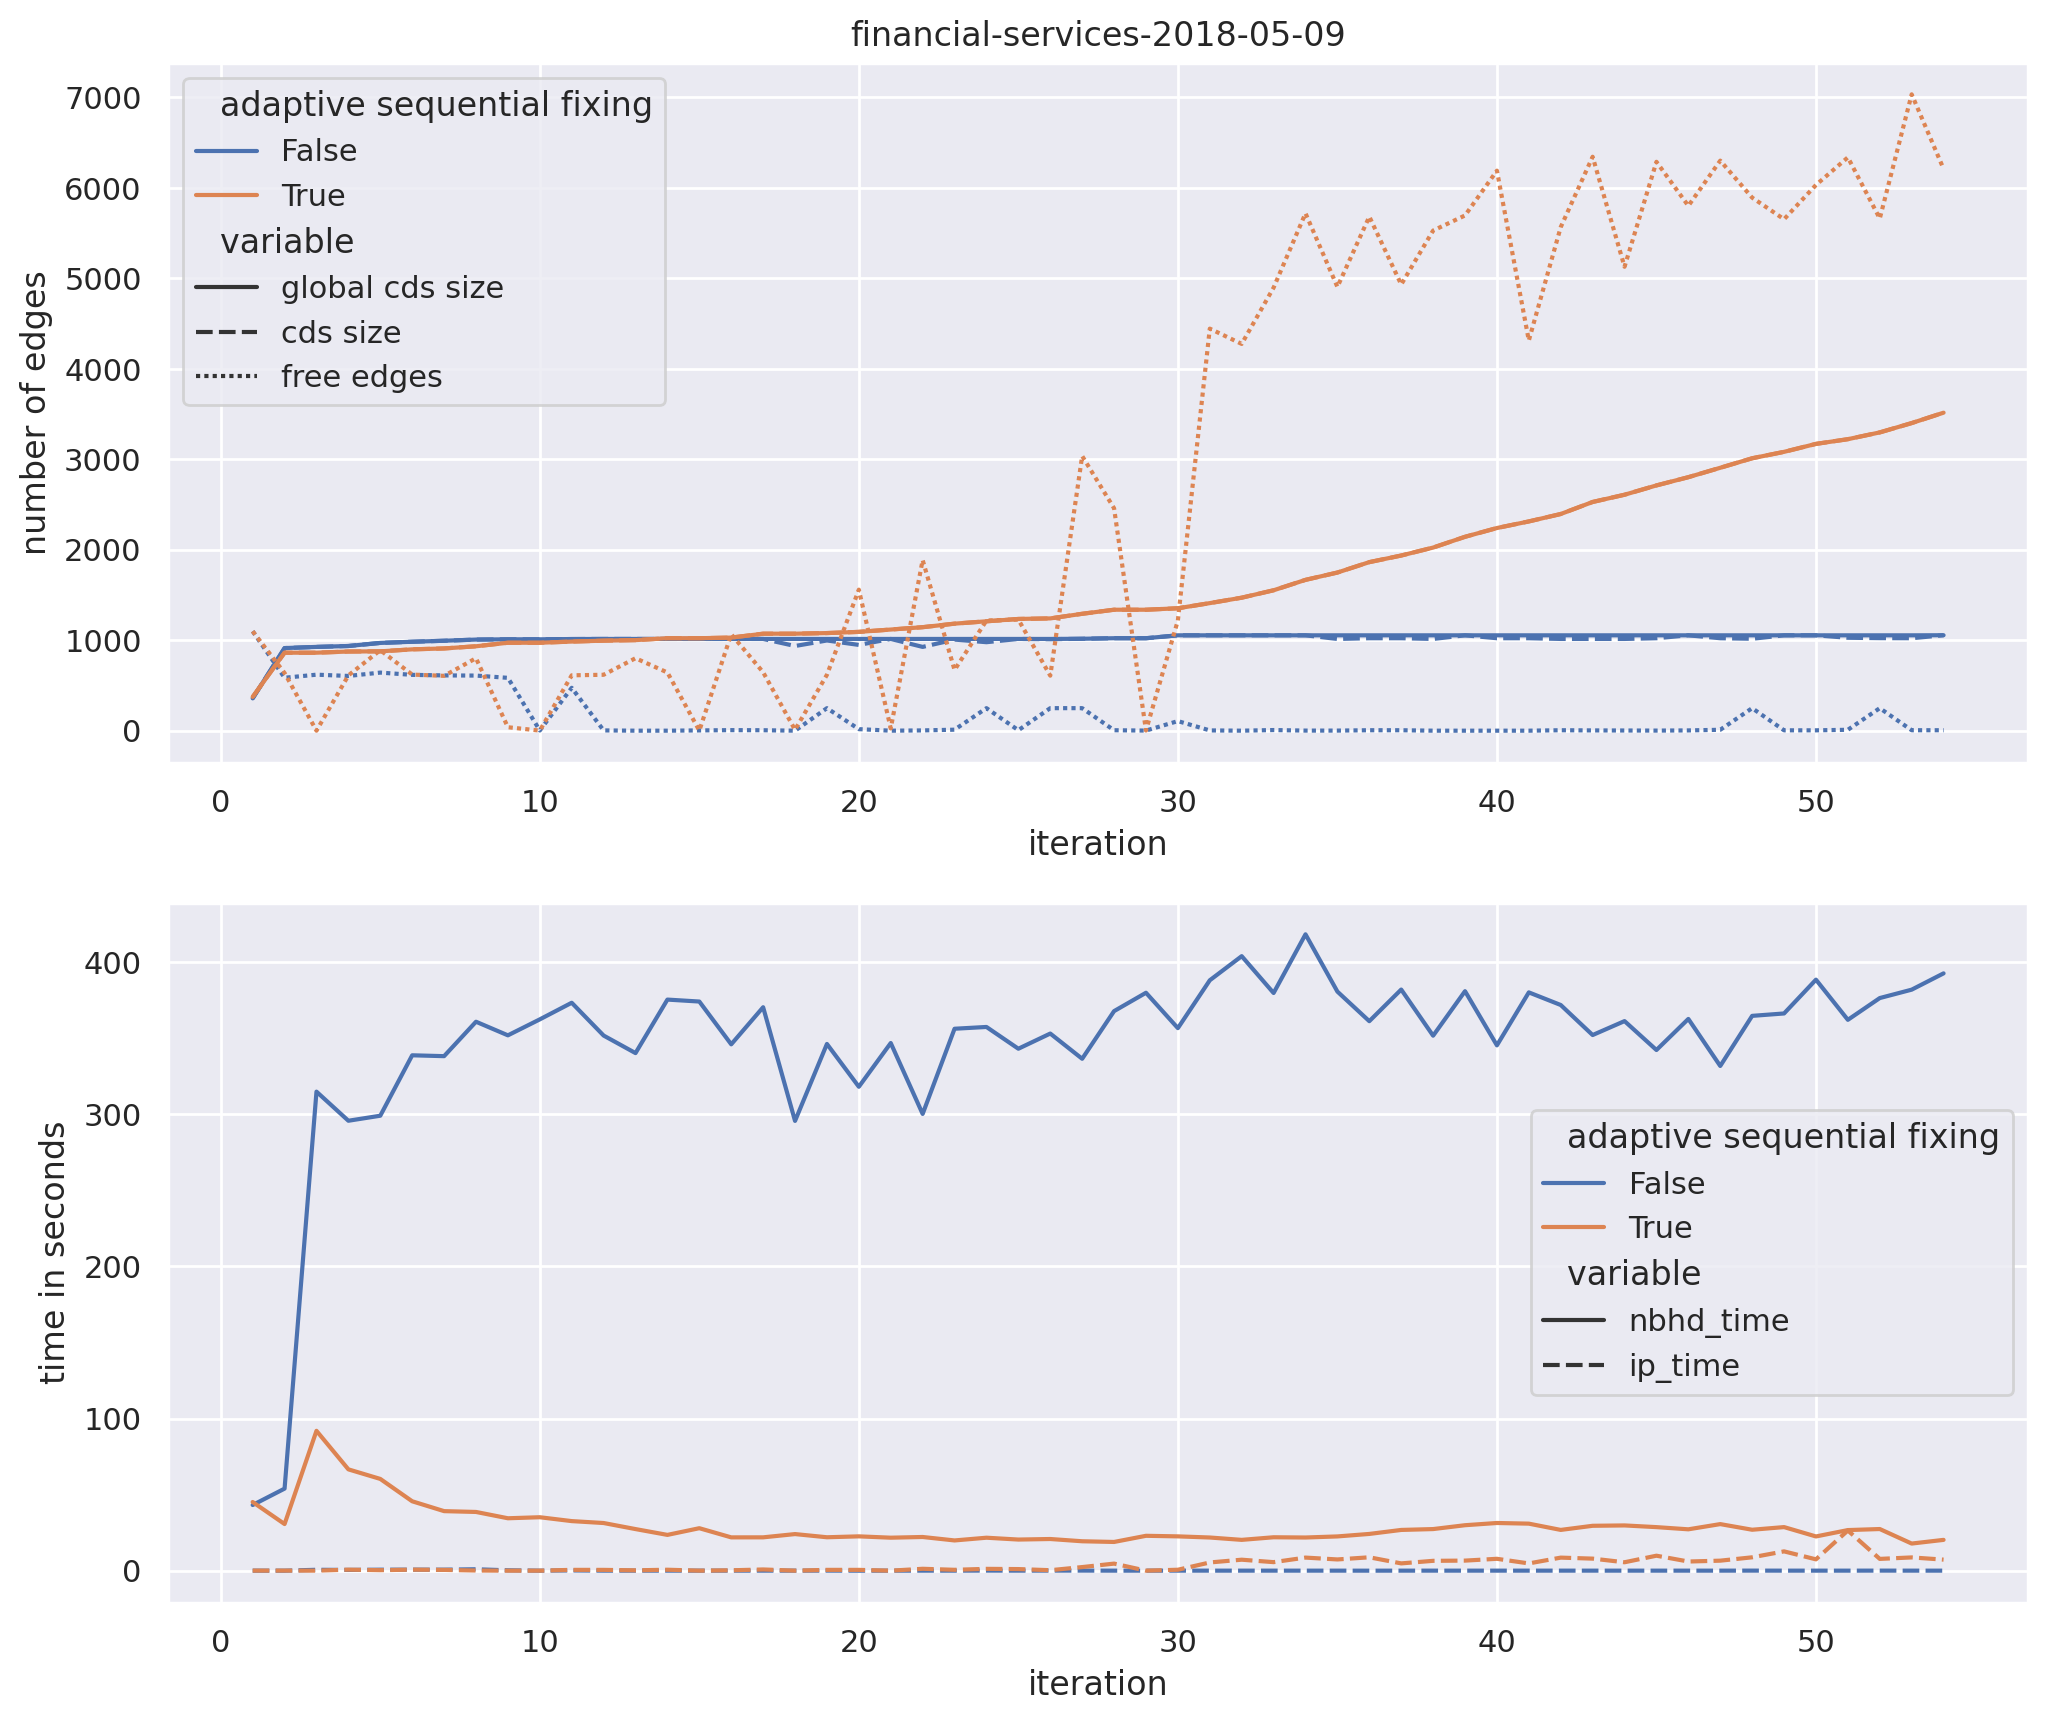

In [6]:
plt.cla()
plt.clf()

for instance, df in molten_data.items():
    plt.cla()
    plt.clf()
    fig, ax = plt.subplots(2, 1)
    fig.set_dpi(200)
    fig.set_size_inches(12, 10)

    sns.lineplot(
        data=df,
        ax=ax[0],
        x="iteration",
        y="number of edges",
        style="variable",
        style_order=["global cds size", "cds size", "free edges"],
        hue="adaptive sequential fixing",
    ).set_title(instance)
    sns.lineplot(
        data=df,
        ax=ax[1],
        x="iteration",
        y="number of edges",
        style="variable",
        style_order=["nbhd_time", "ip_time"],
        hue="adaptive sequential fixing",
    )
    plt.ylabel("time in seconds")
    plt.savefig(f"{instance}_comparison.pdf", bbox_inches="tight")
    print(instance)

In [9]:
import zipfile

INSTANCE_ZIP_PATH = "/home/gabriel/git/software-configuration-problem-cpp/instances/exported_instances.zip"


def get_instance_archive() -> zipfile.ZipFile:
    return zipfile.ZipFile(INSTANCE_ZIP_PATH, "r")


def get_instance_names():
    with get_instance_archive() as archive:
        return [f.filename.split("/")[0] for f in archive.filelist if f.is_dir()]


instances = get_instance_names()

num_vertices = defaultdict(list)
num_edges = defaultdict(list)
with get_instance_archive() as archive:
    for instance in instances:
        n_concrete = int(
            json.loads(archive.read(f"{instance}/index_instance.json"))["n_concrete"]
        )
        num_vertices[instance[:4]].append(n_concrete * 2)
        conflicts = json.loads(archive.read(f"{instance}/conflicts.json"))["conflicts"]
        num_edges[instance[:4]].append((n_concrete * 2) ** 2 - len(conflicts))
        # # initial_sol = json.loads(archive.read(f"{instance}/initial.json"))["initial_mutually_exclusive_set"]
        # assert type(conflicts) == list
        # assert len(conflicts) > 0
        # assert type(initial_sol) == list
        # # assert len(initial_sol) > 0
        # assert n_concrete > 0

for key in num_vertices:
    l1 = num_vertices[key]
    l2 = num_edges[key]

    print(f"{key}: #nodes: min = {min(l1)}, max = {max(l1)}, avg = {sum(l1) / len(l1)}")
    print(f"{key}: #edges: min = {min(l2)}, max = {max(l2)}, avg = {sum(l2) / len(l2)}")

busy: #nodes: min = 812, max = 1722, avg = 1116.035242290749
busy: #edges: min = 653635, max = 2942661, avg = 1275244.1189427313
fias: #nodes: min = 424, max = 504, avg = 470.72727272727275
fias: #edges: min = 159384, max = 224147, avg = 196085.9090909091
fina: #nodes: min = 860, max = 1178, avg = 1105.6
fina: #edges: min = 647659, max = 1237027, avg = 1092393.7
sole: #nodes: min = 196, max = 920, avg = 613.2023121387283
sole: #edges: min = 34284, max = 695967, avg = 348320.9768786127
toyb: #nodes: min = 30, max = 240, avg = 97.41935483870968
toyb: #edges: min = 862, max = 52598, avg = 13702.91935483871
ucli: #nodes: min = 456, max = 510, avg = 479.91011235955057
ucli: #edges: min = 163813, max = 247467, avg = 215639.99438202247
